In [8]:
import pandas as pd

# Load the dataset
file_path = 'soil_analysis_data.csv'
soil_data = pd.read_csv("soil_analysis_data.csv")

# Display the first few rows of the dataset
print("Dataset Overview:")
display(soil_data.head())

# Summary statistics
print("\nSummary Statistics:")
display(soil_data.describe())

# Check for missing values
print("\nMissing Values:")
display(soil_data.isnull().sum())


Dataset Overview:


,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292



Summary Statistics:


,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.495453,1.993592,29.883358,19.729932,39.877907
std,0.517155,0.515340,5.202697,5.067005,4.874751
min,5.889492,0.155817,11.994574,4.961838,24.116481
25%,7.157881,1.638911,26.217325,16.216471,36.703917
50%,7.500129,1.981462,29.822797,19.913737,39.796016
75%,7.846940,2.345688,33.232056,23.122285,43.382039
max,9.038430,3.764528,45.760284,35.588406,54.678290



Missing Values:


District                      0
Soil Type                     0
pH Level                      0
Organic Matter (%)            0
Nitrogen Content (kg/ha)      0
Phosphorus Content (kg/ha)    0
Potassium Content (kg/ha)     0
dtype: int64

In [9]:
import pandas as pd
# General summary
print("Dataset Overview:")
print(soil_data.info())

# Count of rows and columns
print(f"\nNumber of Rows: {soil_data.shape[0]}")
print(f"Number of Columns: {soil_data.shape[1]}")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(soil_data.describe())

# Missing values count
print("\nMissing Values:")
print(soil_data.isnull().sum())

# Unique value counts per column
print("\nUnique Value Counts:")
for col in soil_data.columns:
    print(f"{col}: {soil_data[col].nunique()} unique values")

# Distribution of categorical features
categorical_cols = soil_data.select_dtypes(include=['object']).columns
print("\nCategorical Feature Distribution:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(soil_data[col].value_counts())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1000 non-null   object 
 1   Soil Type                   1000 non-null   object 
 2   pH Level                    1000 non-null   float64
 3   Organic Matter (%)          1000 non-null   float64
 4   Nitrogen Content (kg/ha)    1000 non-null   float64
 5   Phosphorus Content (kg/ha)  1000 non-null   float64
 6   Potassium Content (kg/ha)   1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB
None

Number of Rows: 1000
Number of Columns: 7

Descriptive Statistics:
          pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  1000.000000         1000.000000               1000.000000   
mean      7.495453            1.993592                 29.883358   
std       0.517155            0.51

In [10]:
# Select categorical columns
categorical_cols = soil_data.select_dtypes(include=['object']).columns

# Print unique variables for each categorical feature
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(soil_data[col].unique())
    print()

Unique values in 'District':
['Jaipur' 'Bhilwara' 'Jodhpur' 'Hanumangarh' 'Alwar' 'Udaipur' 'Ajmer'
 'Nagaur' 'Kota' 'Sri Ganganagar']

Unique values in 'Soil Type':
['Chalky (Calcareous)' 'Nitrogenous' 'Sandy' 'Clay' 'Black lava soil'
 'Loamy' 'Saline' 'Alkaline']



In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder_district = LabelEncoder()
label_encoder_soil = LabelEncoder()


# Encode District
soil_data['District'] = label_encoder_district.fit_transform(soil_data['District'])

# Encode Soil Type
soil_data['Soil Type'] = label_encoder_soil.fit_transform(soil_data['Soil Type'])

In [12]:
soil_data.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,4,2,6.546096,1.569807,27.931972,29.438438,42.782766
1,2,5,6.832259,2.243018,22.263480,25.413455,37.644377
2,5,7,7.453182,2.662898,23.564182,13.014409,37.082003
3,4,3,8.019189,1.240327,15.839222,17.744206,42.758704
4,4,7,8.100131,1.768419,27.942867,25.769504,30.651292


In [13]:

# Define conditions for 'Healthy' vs 'Not Healthy'
def classify_soil(row):
    if (
        6.5 <= row['pH Level'] <= 7.5 and
        row['Organic Matter (%)'] > 2.0 and
        row['Nitrogen Content (kg/ha)'] > 20 and
        row['Phosphorus Content (kg/ha)'] > 15 and
        row['Potassium Content (kg/ha)'] > 30
    ):
        return 1  # Healthy
    else:
        return 0  # Not Healthy

# Apply classification
soil_data['Healthy'] = soil_data.apply(classify_soil, axis=1)

# Verify the new column
print("Updated Dataset with 'Healthy' Column:")
display(soil_data.head())

Updated Dataset with 'Healthy' Column:


,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Healthy
0,4,2,6.546096,1.569807,27.931972,29.438438,42.782766,0
1,2,5,6.832259,2.243018,22.263480,25.413455,37.644377,1
2,5,7,7.453182,2.662898,23.564182,13.014409,37.082003,0
3,4,3,8.019189,1.240327,15.839222,17.744206,42.758704,0
4,4,7,8.100131,1.768419,27.942867,25.769504,30.651292,0


In [15]:
# Check the distribution of the 'Healthy' column
healthy_counts = soil_data['Healthy'].value_counts()
healthy_proportions = soil_data['Healthy'].value_counts(normalize=True) * 100

print("Class Distribution (Counts):")
print(healthy_counts)

print("\nClass Distribution (Proportions):")
print(healthy_proportions)

Class Distribution (Counts):
Healthy
0    820
1    180
Name: count, dtype: int64

Class Distribution (Proportions):
Healthy
0    82.0
1    18.0
Name: proportion, dtype: float64


In [17]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assume 'soil_data' is your DataFrame and 'Healthy' is the target column
X = soil_data.drop(columns=['Healthy'])
y = soil_data['Healthy']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data back into a DataFrame
soil_data = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new class distribution
balanced_counts = y_resampled.value_counts()
balanced_proportions = y_resampled.value_counts(normalize=True) * 100

print("Class Distribution After SMOTE:")
print(balanced_counts)
print("\nClass Distribution After SMOTE (Proportions):")
print(balanced_proportions)


Class Distribution After SMOTE:
Healthy
0    820
1    820
Name: count, dtype: int64

Class Distribution After SMOTE (Proportions):
Healthy
0    50.0
1    50.0
Name: proportion, dtype: float64


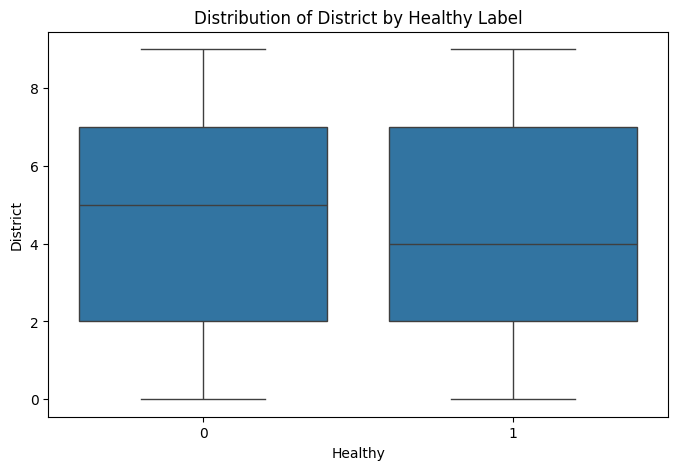

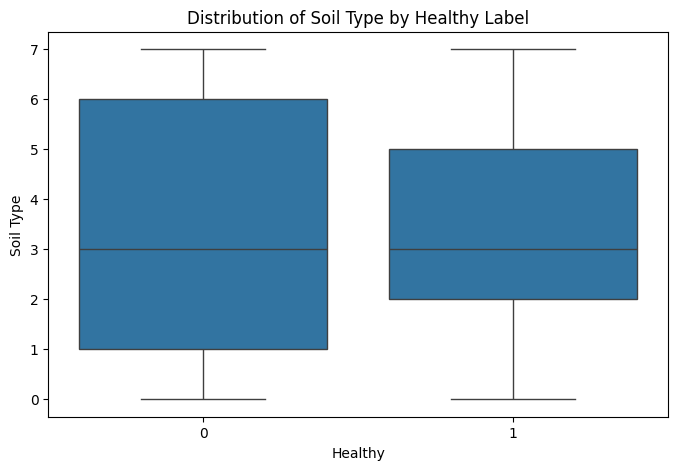

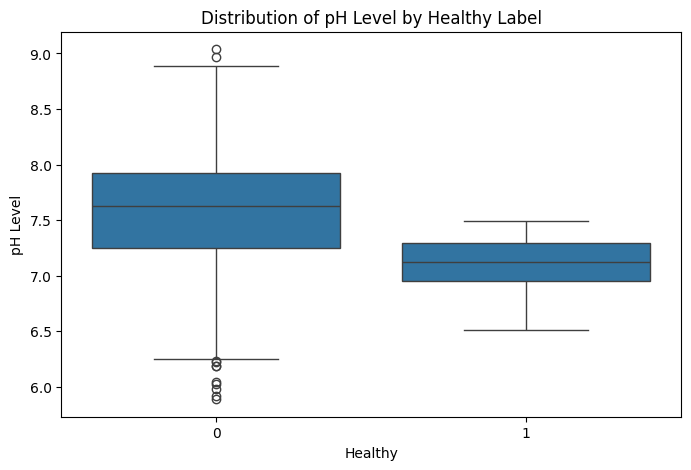

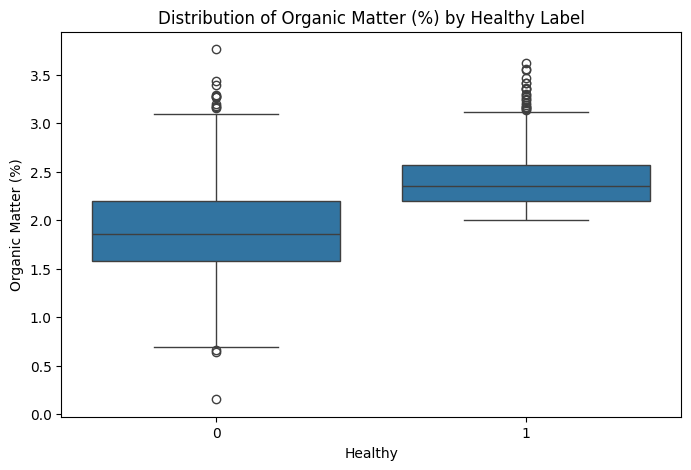

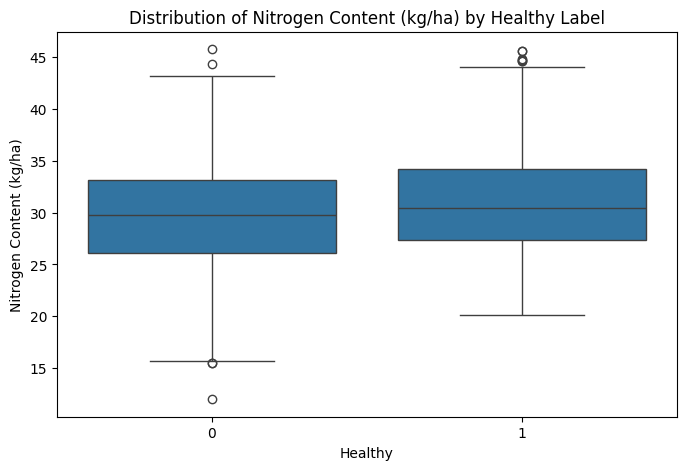

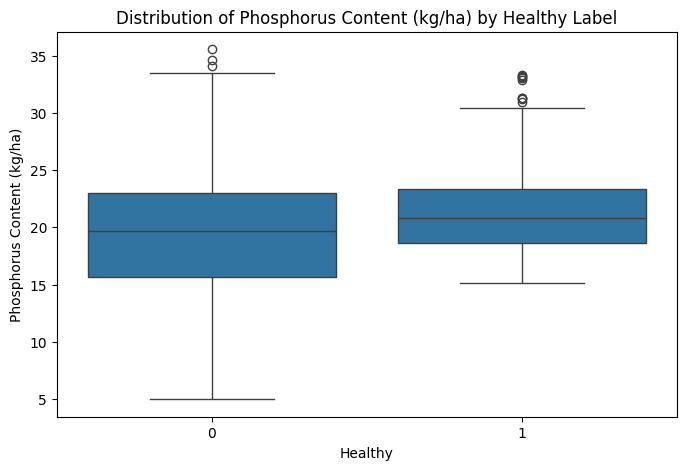

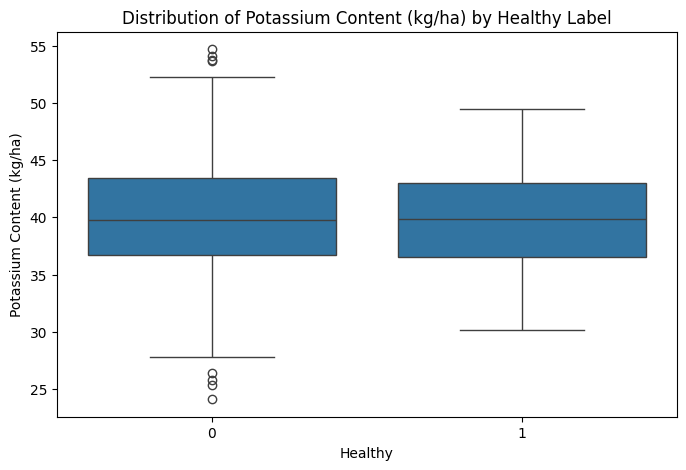


Percentage distribution of District by 'Healthy' label:
Healthy
0    4.537805
1    4.304878
Name: District, dtype: float64

Percentage distribution of Soil Type by 'Healthy' label:
Healthy
0    3.440244
1    3.152439
Name: Soil Type, dtype: float64

Percentage distribution of pH Level by 'Healthy' label:
Healthy
0    7.579364
1    7.106865
Name: pH Level, dtype: float64

Percentage distribution of Organic Matter (%) by 'Healthy' label:
Healthy
0    1.898242
1    2.411280
Name: Organic Matter (%), dtype: float64

Percentage distribution of Nitrogen Content (kg/ha) by 'Healthy' label:
Healthy
0    29.741828
1    30.824919
Name: Nitrogen Content (kg/ha), dtype: float64

Percentage distribution of Phosphorus Content (kg/ha) by 'Healthy' label:
Healthy
0    19.441072
1    21.144026
Name: Phosphorus Content (kg/ha), dtype: float64

Percentage distribution of Potassium Content (kg/ha) by 'Healthy' label:
Healthy
0    39.912434
1    39.802461
Name: Potassium Content (kg/ha), dtype: float64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume soil_data is your DataFrame with 'Healthy' column and feature columns

# 1. Visualize the distribution of each feature relative to 'Healthy'
features = soil_data.drop(columns=['Healthy'])  # Drop 'Healthy' column for features
healthy_label = soil_data['Healthy']

# Plotting box plots for each feature
for feature in features.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=healthy_label, y=features[feature])
    plt.title(f'Distribution of {feature} by Healthy Label')
    plt.xlabel('Healthy')
    plt.ylabel(feature)
    plt.show()

# 2. Calculate percentage distribution of each feature relative to 'Healthy'
for feature in features.columns:
    print(f"\nPercentage distribution of {feature} by 'Healthy' label:")
    
    # Group by 'Healthy' and calculate the mean of each feature
    feature_distribution = soil_data.groupby('Healthy')[feature].mean()
    
    # Calculate the percentage of each class in the feature
    print(feature_distribution)


Correlation with Healthy label:
Healthy                       1.000000
Organic Matter (%)            0.533782
Phosphorus Content (kg/ha)    0.187015
Nitrogen Content (kg/ha)      0.107267
Potassium Content (kg/ha)    -0.011870
District                     -0.041825
Soil Type                    -0.066334
pH Level                     -0.508085
Name: Healthy, dtype: float64


C:\Users\WALID\AppData\Local\Temp\ipykernel_10996\4239515697.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=healthy_correlation.index, y=healthy_correlation.values, palette='coolwarm')


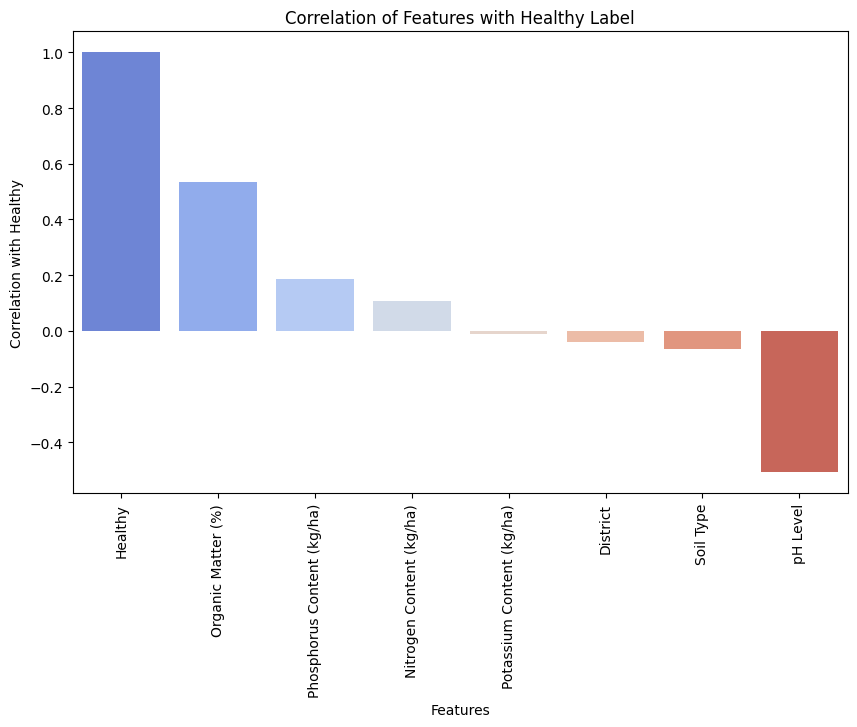

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming soil_data is your DataFrame with the 'Healthy' label and features

# Calculate the correlation of all features with the 'Healthy' label
correlation = soil_data.corr()

# Extract the correlation with 'Healthy'
healthy_correlation = correlation['Healthy'].sort_values(ascending=False)

# Display the correlation
print("Correlation with Healthy label:")
print(healthy_correlation)

# Visualize the correlation using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=healthy_correlation.index, y=healthy_correlation.values, palette='coolwarm')
plt.title('Correlation of Features with Healthy Label')
plt.xlabel('Features')
plt.ylabel('Correlation with Healthy')
plt.xticks(rotation=90)
plt.show()


In [23]:
# Select the important features and the label
Data = soil_data[['Organic Matter (%)', 'pH Level', 'Healthy']]

# Display the updated dataset
print("Updated Dataset with Selected Features:")
display(selected_features.head())

Updated Dataset with Selected Features:


,Organic Matter (%),pH Level,Healthy
0,1.569807,6.546096,0
1,2.243018,6.832259,1
2,2.662898,7.453182,0
3,1.240327,8.019189,0
4,1.768419,8.100131,0


In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already selected relevant features (e.g., 'Organic Matter (%)' and 'pH Level')
X = Data[['Organic Matter (%)', 'pH Level']]  # Features
y = Data['Healthy']  # Target label

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for deeper insight
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8049

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       177
           1       0.76      0.85      0.80       151

    accuracy                           0.80       328
   macro avg       0.81      0.81      0.80       328
weighted avg       0.81      0.80      0.81       328


Confusion Matrix:
[[136  41]
 [ 23 128]]


In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already selected relevant features (e.g., 'Organic Matter (%)' and 'pH Level')
X = soil_data[['Organic Matter (%)', 'pH Level']]  # Features
y = soil_data['Healthy']  # Target label

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for deeper insight
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (to understand the contribution of each feature)
print("\nFeature Importance:")
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.9451

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       177
           1       0.90      0.99      0.94       151

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328


Confusion Matrix:
[[161  16]
 [  2 149]]

Feature Importance:
Organic Matter (%): 0.5012
pH Level: 0.4988


In [26]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already selected relevant features (e.g., 'Organic Matter (%)' and 'pH Level')
X = soil_data[['Organic Matter (%)', 'pH Level']]  # Features
y = soil_data['Healthy']  # Target label

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for deeper insight
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (to understand the contribution of each feature)
print("\nFeature Importance:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.9421

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       177
           1       0.90      0.99      0.94       151

    accuracy                           0.94       328
   macro avg       0.94      0.95      0.94       328
weighted avg       0.95      0.94      0.94       328


Confusion Matrix:
[[160  17]
 [  2 149]]

Feature Importance:
Organic Matter (%): 0.5288
pH Level: 0.4712


In [29]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already selected relevant features (e.g., 'Organic Matter (%)' and 'pH Level')
X = soil_data[['Organic Matter (%)', 'pH Level']]  # Features
y = soil_data['Healthy']  # Target label

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Classifier
model1 = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, cat_features=[])

# Train the model on the training data
model1.fit(X_train, y_train, verbose=False)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for deeper insight
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (to understand the contribution of each feature)
print("\nFeature Importance:")
feature_importance = model1.get_feature_importance()
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.9421

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       177
           1       0.90      0.99      0.94       151

    accuracy                           0.94       328
   macro avg       0.94      0.95      0.94       328
weighted avg       0.95      0.94      0.94       328


Confusion Matrix:
[[160  17]
 [  2 149]]

Feature Importance:
Organic Matter (%): 43.2234
pH Level: 56.7766


In [30]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already selected relevant features (e.g., 'Organic Matter (%)' and 'pH Level')
X = soil_data[['Organic Matter (%)', 'pH Level']]  # Features
y = soil_data['Healthy']  # Target label

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN Classifier (K=5 by default)
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for deeper insight
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9451

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       177
           1       0.90      0.99      0.94       151

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328


Confusion Matrix:
[[161  16]
 [  2 149]]
